# Sentiment Analysis for Beats

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('new_reference_data_for_beats.csv')
df.head()

Saving new_reference_data_for_beats.csv to new_reference_data_for_beats.csv


,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes
0,R1TIU27G892G8N,B09GJVTRNZ,5.0 out of 5 stars Best for modern music; fine...,Glut & Lack: troublemaking twins,5,Love this little speaker for the music I (and ...,"Reviewed in the United States January 14, 2025",AEMU5GYR7E7YH5B64AKBUNZ5Y4PA,1,19,"Color: Blue, Style: Flip 6"
1,R3UHPD69SUVF4D,B09GJVTRNZ,5.0 out of 5 stars Incredible Sound and Perfor...,Seva,5,I recently bought the JBL Flip 6 Portable Blue...,"Reviewed in the United States January 4, 2025",AF2OOF3FJWVX65HP72K6CVPMONRA,1,14,"Color: Teal, Style: Flip 6"
2,R8ZPP4M7T18BO,B09GJVTRNZ,5.0 out of 5 stars The Sound Is Great,Michelle,5,I'm so glad I bought this. I use it daily I ha...,"Reviewed in the United States April 16, 2025",AHHSFRGEAFWTV24U7MFCK7V54P7Q,1,1,"Color: Blue, Style: Flip 6"
3,R3T9HSXO492VDG,B09GJVTRNZ,5.0 out of 5 stars Incredible Sound and Durabi...,Paola J Franco,5,The sound quality is amazing for such a compac...,"Reviewed in the United States February 28, 2025",AGIUPLMVY4PLRDFR6DCBYAG53LWQ,1,6,"Color: White, Style: Flip 6"
4,RF4X9MUCFL4QZ,B09GJVTRNZ,5.0 out of 5 stars Not too small Not too big,Nikki Fox,5,"These are not huge, but great for my sports pl...","Reviewed in the United States April 17, 2025",AEP7HYGSBZ5Q2DII5UM2CWYXUQUA,1,1,"Color: Blue, Style: Flip 6"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4990 entries, 0 to 4989
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   review_id           4990 non-null   object
 1   product_id          4990 non-null   object
 2   title               4990 non-null   object
 3   author              4989 non-null   object
 4   rating              4990 non-null   int64 
 5   content             4982 non-null   object
 6   timestamp           4990 non-null   object
 7   profile_id          4990 non-null   object
 8   is_verified         4990 non-null   int64 
 9   helpful_count       4990 non-null   int64 
 10  product_attributes  4766 non-null   object
dtypes: int64(3), object(8)
memory usage: 429.0+ KB


In [4]:
df.isna().sum()

,0
review_id,0
product_id,0
title,0
author,1
rating,0
content,8
timestamp,0
profile_id,0
is_verified,0
helpful_count,0


In [5]:
df.shape

(4990, 11)

In [6]:
df = df.dropna()
df.isna().sum()

,0
review_id,0
product_id,0
title,0
author,0
rating,0
content,0
timestamp,0
profile_id,0
is_verified,0
helpful_count,0


In [7]:
df.shape

(4758, 11)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df['product_id'].unique()

array(['B09GJVTRNZ', 'B0BYC52LYP', 'B08X4YMTPM', 'B0D6WD2QSQ',
       'B0DYB6KMJH', 'B0CVFKZ1LC', 'B0BW34LCB8', 'B09PYVXXW5',
       'B09FM6PDHP', 'B09HN594TL', 'B096SV8SJG', 'B0BTZKP1TP',
       'B08ZR5JB9G', 'B0C2F5KD26', 'B0BYPFNW6T', 'B093SLWMS7',
       'B0CXL4FQBK', 'B099TJGJ91', 'B0D4SX9RC6', 'B0B44F1GGK',
       'B09XXW54QG', 'B07DD3WBYW', 'B07YBN9XXG', 'B0CY6S748H',
       'B01IOD7KB6', 'B0CVFM97GD', 'B08NLCW9WY', 'B08YRT9T38',
       'B08VL5S148', 'B097XX34SL', 'B07PXGQC1Q', 'B0BZ9WMLNQ',
       'B0D3JB14QS', 'B0BQPNMXQV', 'B0C1QWWZR4', 'B0CF7GYNW2',
       'B09CFP6J6D', 'B0BZTCXG6T', 'B0863H1JKB', 'B09JL41N9C',
       'B09V9P5Q6W', 'B0BZK2Z2TC', 'B0C345M3T7', 'B0CD2FSRDD',
       'B0CPFV77W4', 'B0B1NGPY94', 'B0BYSQDWRT', 'B0B2SH4CN6',
       'B09D1HMBQ3', 'B0D4STD5ZC', 'B099TLMRB6', 'B07GWRCZQP',
       'B09GK5JMHK', 'B088KRKFJ3', 'B08Z1RP9K8', 'B0B445JCZ3',
       'B0B43Y8GHZ'], dtype=object)

In [10]:
# Dictionary mapping ASIN to Product Name
product_mapping = {
    'B096SV8SJG': 'Beats Studio Buds',
    'B0D3JB14QS': 'Beats Solo Buds',
    'B09JL41N9C': 'Beats Fit Pro (1st Gen)',
    'B0BZK2Z2TC': 'Beats Studio Buds+',
    'B0C345M3T7': 'Sony WF-1000XM5',
    'B09V9P5Q6W': 'JBL Live Pro 2',
    'B0863H1JKB': 'Panasonic True Wireless Earbuds',
    'B0BZTCXG6T': 'Panasonic ErgoFit True Wireless Earbuds',
    'B09CFP6J6D': 'Sony WF-C500',
    'B0CF7GYNW': 'Samsung Galaxy Buds FE',
    'B0C1QWWZR4': 'JBL Tune Buds',
    'B0BQPNMXQV': 'JBL Vibe Beam'
}

# Replace ASIN with Product Name
df['product_name'] = df['product_id'].map(product_mapping)

# Save the updated dataset
df.to_csv('updated_dataset.csv', index=False)

df = pd.read_csv('updated_dataset.csv')

print(df.shape)
print(df.isna().sum())

(4758, 12)
review_id                0
product_id               0
title                    0
author                   0
rating                   0
content                  0
timestamp                0
profile_id               0
is_verified              0
helpful_count            0
product_attributes       0
product_name          3744
dtype: int64


In [11]:
df = df.dropna()
print(df.shape)
print(df.isna().sum())

(1014, 12)
review_id             0
product_id            0
title                 0
author                0
rating                0
content               0
timestamp             0
profile_id            0
is_verified           0
helpful_count         0
product_attributes    0
product_name          0
dtype: int64


Now let's start sentiment analysis with Blob

In [13]:
# Create new columns for polarity and subjectivity
df['Polarity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Subjectivity'] = df['content'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Preview the updated dataset
df.head()

,review_id,product_id,title,author,rating,content,timestamp,profile_id,is_verified,helpful_count,product_attributes,product_name,Polarity,Subjectivity
343,RUUJJA0TERA67,B096SV8SJG,5.0 out of 5 stars Compared to 4 other Earbuds...,Connor,5,I bought these earbuds along with 4 other pair...,"Reviewed in the United States August 11, 2022",AFEITP6Y25NKH3KB2LXWQCC7STIA,1,2277,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds,0.165309,0.530769
344,R3EO2GBST2UICI,B096SV8SJG,5.0 out of 5 stars Initial review and comparis...,philip seitz,5,I love these earbuds. They feel definitely wor...,"Reviewed in the United States September 28, 2023",AFMDCDCHBIWSEI6RDYBCY4MXXVZQ,1,562,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds,0.175475,0.511177
345,R2D114QWXW4IOU,B096SV8SJG,5.0 out of 5 stars I think they’re great,Maizy,5,I like the sound a lot. I read a previous revi...,"Reviewed in the United States July 27, 2024",AFRVRGYJJSBAELQK6XVCXXBCJXLA,1,3,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds,0.231061,0.536742
346,R29LYUZ7DI2CS6,B096SV8SJG,"4.0 out of 5 stars Quality sound and build, BU...",Everest,4,"After using these for a couple weeks straight,...","Reviewed in the United States August 3, 2024",AEDBORE5CT34E6D7QVXFZW5ZERCA,1,0,Color: BlackStyle: Studio BudsSet: Without App...,Beats Studio Buds,0.156094,0.456813
347,RRC5SI8P44LH4,B096SV8SJG,5.0 out of 5 stars Excellent -- Budget Friendl...,Mary Trotta,5,Been a few months (May 2024) since the purchas...,"Reviewed in the United States July 21, 2024",AGRC63RAW4DZCOTB2NDTUFP7SRFA,1,3,Color: Sunset PinkStyle: Studio BudsSet: Witho...,Beats Studio Buds,0.364540,0.786432


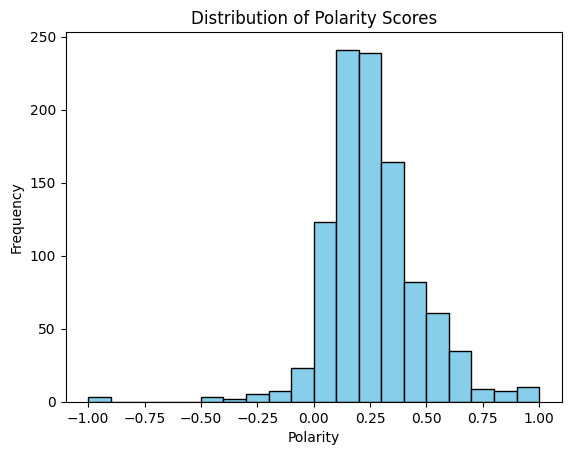

In [14]:
# Plot histogram of polarity
plt.hist(df['Polarity'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Polarity Scores")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()

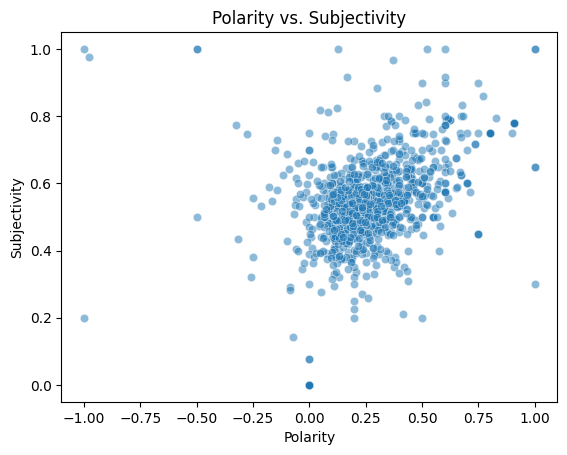

In [15]:
# Scatter plot
sns.scatterplot(x='Polarity', y='Subjectivity', data=df, alpha=0.5)
plt.title("Polarity vs. Subjectivity")
plt.xlabel("Polarity")
plt.ylabel("Subjectivity")
plt.show()

In [16]:
def categorize_sentiment(polarity):
    if polarity > 0.2:
        return 'Positive'
    elif polarity < -0.2:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization
df['Sentiment'] = df['Polarity'].apply(categorize_sentiment)

# Count the number of each sentiment
print(df['Sentiment'].value_counts())

Sentiment
Positive    607
Neutral     394
Negative     13
Name: count, dtype: int64


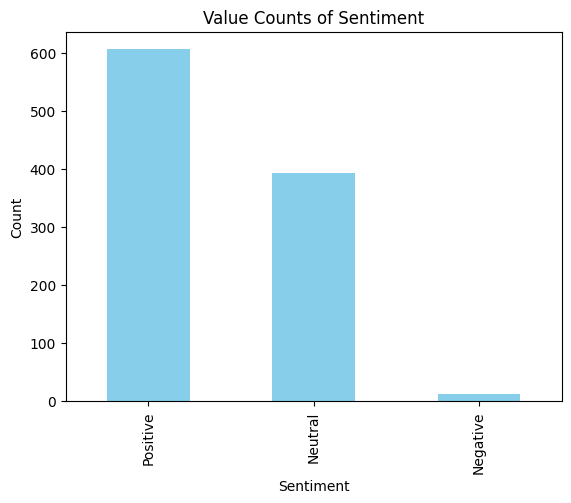

In [17]:
df['Sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Value Counts of Sentiment')
plt.show()

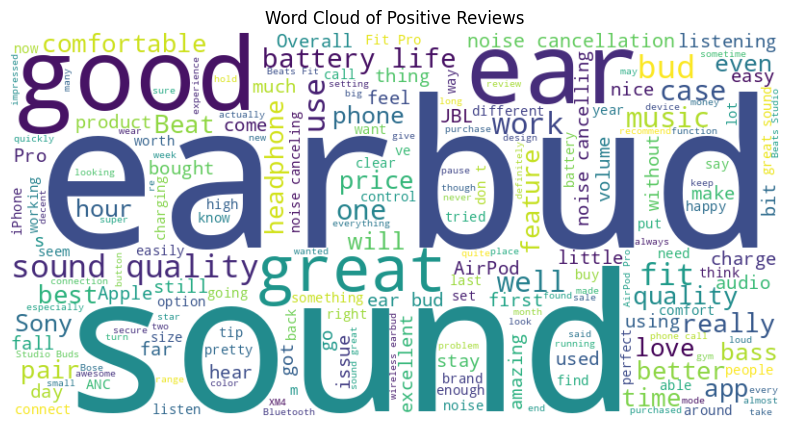

In [19]:
# Generate word cloud for positive reviews
positive_reviews = " ".join(df[df['Sentiment'] == 'Positive']['content'])
wordcloud = WordCloud(background_color='white', width=800, height=400).generate(positive_reviews)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

In [20]:
df.to_csv('earbud_reviews_with_sentiment.csv', index=False)